In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

np.set_printoptions(suppress=True)
pd.set_option('display.max_columns', 100)

# data_dir = '../dataset/_datasets/cluster_res/out_v01/'

data_dir = '../dataset/_datasets/cluster_res/out_dna_only_v01/'
data_file = 'train.csv'
data_file = os.path.join(data_dir, data_file)

madf = pd.read_csv(data_file, sep='\t', low_memory=False)
print(len(madf))
madf.head(3)

4464


,level_0,index,exp_id,key_complex,dataset_id,UniProt,protein_sequence,nucleotide_sequence,nucleic_acid_mutation,protein_mutation,nucleic_acid_type,nucleic_acid_type_new,Kd,dG,pH,Tm,Method,pmid,data_source,protein_na_pair,multiple_dg,max_min,max_min_judge,dG_ori,pdb_id,len_p1,len_p2,protein_chain,na_chain,identity_protein_seq,identity_na_seq,UniProt_type,protein_sequence_len,wt_af2_file_download,mo_pdb_chain,bs_score,nucleotide_sequence_one,nucleotide_sequence_two,nucleotide_sequence_two_reverse,align_score,len_nucleotide_sequence_one,len_nucleotide_sequence_two,coverage_nucleotide_sequence_one,coverage_nucleotide_sequence_two,coverage_mean_nucleotide_sequence,protein_index,cluster_protein_50_index,cluster_protein_50_number,cluster_protein_50_member,na_index,cluster_na_50_index,cluster_na_50_number,cluster_na_50_member,protein_na_pair_index,protein_50_na_50_member,protein_50_na_50_number,cluster_protein_na_pair_index,dataset_id_pdb_id_protein_index,protein_species,na_jobid,nucleotide_sequence_fornew_na_fea,newnafea_na_job,AF2_filname,AF2_protein_sequence_len,pLDDT_median,protein_50_na_50_member_Li_clustertype,protein_50_na_50_number_Li_clustertype,cluster_protein_na_pair_index_Li_clustertype,mutation_type,protein_sequence_number,protein_sequence_wild,complex_type,dist_index,key_nucleic_acids,wt_complex,pclass,nuclass,base_class,avg_dist_to_others
0,0,0,0,0,pnat_143,P04150,MDSKESLTPGREENPSSVLAQERGDVMDFYKTLRGGATVKVSASSP...,CGCCTCCGGGAGAGCT,NONE,WILD,ssDNA,ssDNA,3.600000e-07,-8.79,7.5,298.0,Isothermal titration calorimetry,23222642,pnat,MDSKESLTPGREENPSSVLAQERGDVMDFYKTLRGGATVKVSASSP...,1,0.0,good,-8.79,3fyl,"A:74,B:76","C:16,D:16",A_1.B_1,C_1.D_1,0.1,0.25,Swiss-Prot,777,yes,"1m2z_A,6cfn_C","0.7293488372093023,0.23546511627906977",NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,protein_6,Cluster_43,9,"protein_6,protein_965,protein_966,protein_1059...",ssDNA0,Cluster_1008,1,ssDNA0,protein_6_ssDNA0,protein_6_ssDNA0,1,cluster_pair_0,pnat_143_3fyl_protein_6,Rattus norvegicus,DNA_0022,CGCCTCCGGGAGAGCT,new_DNA_0,AF-P04150-F1-model_v4.pdb,777,40.51,"protein_6_ssDNA0,protein_34_ssDNA28,protein_34...",29,cluster_pair_0,WILD,6,MDSKESLTPGREENPSSVLAQERGDVMDFYKTLRGGATVKVSASSP...,wt,ssDNA0,Single_DNA_0,True,PCluster_445,SDNACluster_1394,SDNACluster_1394-PCluster_445,3.415964
1,1,4,4,4,pnat_14714,Q8RNV8,MKIWSKEEVVNKLHEIKNKGYLSVPTDMFRTDDGVVGQILERQFGV...,CGCACGACTTCCTGGAAGAGCACGC,NONE,WILD,DNA,ssDNA,5.000000e-10,-12.69,8.3,298.0,Gel shift,21227928,pnat,MKIWSKEEVVNKLHEIKNKGYLSVPTDMFRTDDGVVGQILERQFGV...,1,0.0,good,-12.69,3imb,A:238,"E:9,F:9",A_1,E_1.F_1,1.0,0.28,TrEMBL,238,yes,2q10_A,1.0,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,protein_13,Cluster_41,7,"protein_13,protein_107,protein_108,protein_109...",ssDNA4,Cluster_1011,1,ssDNA4,protein_13_ssDNA4,"protein_13_ssDNA4,protein_107_ssDNA4,protein_1...",7,cluster_pair_3,pnat_14714_3imb_protein_13,Brevibacillus centrosporus,DNA_0228,CGCACGACTTCCTGGAAGAGCACGC,new_DNA_4,AF-Q8RNV8-F1-model_v4.pdb,238,95.19,"protein_13_ssDNA3,protein_13_ssDNA4,protein_10...",21,cluster_pair_2,WILD,7,MKIWSKEEVVNKLHEIKNKGYLSVPTDMFRTDDGVVGQILERQFGV...,wt,ssDNA4,Single_DNA_4,True,PCluster_447,SDNACluster_567,SDNACluster_567-PCluster_447,3.389794
2,6,10,10,10,pnat_15076,P17676,MQRLVAWDPACLPLPPPPPAFKSMEVANFYYEADCLAAAYGGKAAP...,TATATTGCGCAATATA,NONE,WILD,DNA,ssDNA,7.000000e-08,-10.42,7.5,318.0,Isothermal Titration Calorimetry (ITC),30566668,pnat,MQRLVAWDPACLPLPPPPPAFKSMEVANFYYEADCLAAAYGGKAAP...,1,0.0,good,-10.42,1gu4,"A:66,B:68","C:16,D:16",A_1.B_1,C_1.D_1,0.2,0.75,Swiss-Prot,345,yes,1h88_B,0.9517297297297297,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,protein_17,Cluster_322,2,"protein_1512,protein_17",ssDNA10,Cluster_1017,1,ssDNA10,protein_17_ssDNA10,"protein_1512_ssDNA10,protein_17_ssDNA10",2,cluster_pair_9,pnat_15076_1gu4_protein_17,Homo sapiens,DNA_0234,TATATTGCGCAATATA,new_DNA_10,AF-P17676-F1-model_v4.pdb,345,49.81,"protein_17_ssDNA10,protein_17_ssDNA38,protein_...",6,cluster_pair_7,WILD,2,MQRLVAWDPACLPLPPPPPAFKSMEVANFYYEADCL

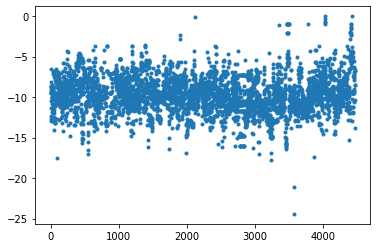

In [4]:
labels = madf['dG'].values

plt.plot(labels, '.')

In [9]:
intervals = np.array([np.inf, -4., -6., -8., -10., -12., -14., -16., -np.inf], dtype=np.float32)
print("n: ", len(intervals)-1)

def get(label):
    for ind, pair in enumerate(zip(intervals[:-1], intervals[1:])):
        i, j = pair # max, min
        if label <= i and label > j:
            return ind
        

for label in [1., 0.1, -3.2, -9.2, -13.4, -23.2, -25.3]:
    print(get(label))

n:  8
0
0
0
3
5
7
7


In [3]:
cnt_dd = 0
cnt_sd = 0
cnt_dr = 0
cnt_sr = 0
for it in madf['key_nucleic_acids'].values:
    if 'Double_DNA' in it:
        cnt_dd += 1
    elif 'Single_DNA' in it:
        cnt_sd += 1
    elif 'Double_RNA' in it:
        cnt_dr += 1
    elif 'Single_RNA' in it:
        cnt_sr += 1
cnt_dd, cnt_sd, cnt_dr, cnt_sr

(2393, 2098, 108, 1467)

In [13]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

np.set_printoptions(suppress=True)
pd.set_option('display.max_columns', 100)

data_dir = '../dataset/tmp_data/hard02/train/'
data_file = 'train.csv'
data_file = os.path.join(data_dir, data_file)

madf = pd.read_csv(data_file, sep='\t', low_memory=False)
madf.head(3)

,level_0,index,exp_id,key_complex,dataset_id,UniProt,protein_sequence,nucleotide_sequence,nucleic_acid_mutation,protein_mutation,nucleic_acid_type,nucleic_acid_type_new,Kd,dG,pH,Tm,Method,pmid,data_source,protein_na_pair,multiple_dg,max_min,max_min_judge,dG_ori,pdb_id,len_p1,len_p2,protein_chain,na_chain,identity_protein_seq,identity_na_seq,UniProt_type,protein_sequence_len,wt_af2_file_download,mo_pdb_chain,bs_score,nucleotide_sequence_one,nucleotide_sequence_two,nucleotide_sequence_two_reverse,align_score,len_nucleotide_sequence_one,len_nucleotide_sequence_two,coverage_nucleotide_sequence_one,coverage_nucleotide_sequence_two,coverage_mean_nucleotide_sequence,protein_index,cluster_protein_50_index,cluster_protein_50_number,cluster_protein_50_member,na_index,cluster_na_50_index,cluster_na_50_number,cluster_na_50_member,protein_na_pair_index,protein_50_na_50_member,protein_50_na_50_number,cluster_protein_na_pair_index,dataset_id_pdb_id_protein_index,protein_species,na_jobid,nucleotide_sequence_fornew_na_fea,newnafea_na_job,AF2_filname,AF2_protein_sequence_len,pLDDT_median,protein_50_na_50_member_Li_clustertype,protein_50_na_50_number_Li_clustertype,cluster_protein_na_pair_index_Li_clustertype,mutation_type,protein_sequence_number,protein_sequence_wild,complex_type,dist_index,key_nucleic_acids,wt_complex,pclass,nuclass,base_class,avg_dist_to_others
0,0,0,0,0,pnat_143,P04150,MDSKESLTPGREENPSSVLAQERGDVMDFYKTLRGGATVKVSASSP...,CGCCTCCGGGAGAGCT,NONE,WILD,ssDNA,ssDNA,3.600000e-07,-8.79,7.5,298.0,Isothermal titration calorimetry,23222642,pnat,MDSKESLTPGREENPSSVLAQERGDVMDFYKTLRGGATVKVSASSP...,1,0.0,good,-8.79,3fyl,"A:74,B:76","C:16,D:16",A_1.B_1,C_1.D_1,0.1,0.25,Swiss-Prot,777,yes,"1m2z_A,6cfn_C","0.7293488372093023,0.23546511627906977",NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,protein_6,Cluster_43,9,"protein_6,protein_965,protein_966,protein_1059...",ssDNA0,Cluster_1008,1,ssDNA0,protein_6_ssDNA0,protein_6_ssDNA0,1,cluster_pair_0,pnat_143_3fyl_protein_6,Rattus norvegicus,DNA_0022,CGCCTCCGGGAGAGCT,new_DNA_0,AF-P04150-F1-model_v4.pdb,777,40.51,"protein_6_ssDNA0,protein_34_ssDNA28,protein_34...",29,cluster_pair_0,WILD,6,MDSKESLTPGREENPSSVLAQERGDVMDFYKTLRGGATVKVSASSP...,wt,ssDNA0,Single_DNA_0,True,PCluster_445,SDNACluster_1394,SDNACluster_1394-PCluster_445,3.415964
1,1,3,3,3,pnat_14707,Q8RNV8,MKIWSKEEVVNKLHEIKNKGYLSVPTDMFRTDDGVVGQILERQFGV...,CGCACGACTTCCCGGAAGAGCACGC,NONE,WILD,DNA,ssDNA,5.000000e-10,-12.69,8.3,298.0,Gel shift,21227928,pnat,MKIWSKEEVVNKLHEIKNKGYLSVPTDMFRTDDGVVGQILERQFGV...,1,0.0,good,-12.69,3imb,A:238,"E:9,F:9",A_1,E_1.F_1,1.0,0.32,TrEMBL,238,yes,2q10_A,1.0,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,protein_13,Cluster_41,7,"protein_13,protein_107,protein_108,protein_109...",ssDNA3,Cluster_1010,1,ssDNA3,protein_13_ssDNA3,"protein_13_ssDNA3,protein_107_ssDNA3,protein_1...",7,cluster_pair_2,pnat_14707_3imb_protein_13,Brevibacillus centrosporus,DNA_0227,CGCACGACTTCCCGGAAGAGCACGC,new_DNA_3,AF-Q8RNV8-F1-model_v4.pdb,238,95.19,"protein_13_ssDNA3,protein_13_ssDNA4,protein_10...",21,cluster_pair_2,WILD,7,MKIWSKEEVVNKLHEIKNKGYLSVPTDMFRTDDGVVGQILERQFGV...,wt,ssDNA3,Single_DNA_3,True,PCluster_447,SDNACluster_426,SDNACluster_426-PCluster_447,3.395008
2,2,4,4,4,pnat_14714,Q8RNV8,MKIWSKEEVVNKLHEIKNKGYLSVPTDMFRTDDGVVGQILERQFGV...,CGCACGACTTCCTGGAAGAGCACGC,NONE,WILD,DNA,ssDNA,5.000000e-10,-12.69,8.3,298.0,Gel shift,21227928,pnat,MKIWSKEEVVNKLHEIKNKGYLSVPTDMFRTDDGVVGQILERQFGV...,1,0.0,good,-12.69,3imb,A:238,"E:9,F:9",A_1,E_1.F_1,1.0,0.28,TrEMBL,238,yes,2q10_A,1.0,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,protein_13,Cluster_41,7,"protein_13,protein_107,protein_108,protein_109...",ssDNA4,Cluster_1011,1,ssDNA4,protein_13_ssDNA4,"protein_13_ssDNA4,protein_107_ssDNA4,protein_1...",7,cluster_pair_3,pnat_14714_3imb_protein_13,Brevibacillus centrosporus,DNA_0228,CGCACGACTTCCTGGAAGAGCACGC,new_DNA_4,AF-Q8RNV8-F1-model_v4.pdb,238,95.19,"protein_13_ssDNA3,protein_13_ssDNA4,protein_10...",21,cluster_pair_2,WILD,7,MKIWSKEEVVNKLHEIKNKGYLSVPTDMFRTDDGV

In [15]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

np.set_printoptions(suppress=True)
pd.set_option('display.max_columns', 100)

data_dir = '../dataset/tmp_data/hard02/val/'
data_file = 'test.csv'
data_file = os.path.join(data_dir, data_file)

madf = pd.read_csv(data_file, sep='\t', low_memory=False)
print(len(madf))
madf.head(3)

2197


,index,exp_id,key_complex,dataset_id,UniProt,protein_sequence,nucleotide_sequence,nucleic_acid_mutation,protein_mutation,nucleic_acid_type,nucleic_acid_type_new,Kd,dG,pH,Tm,Method,pmid,data_source,protein_na_pair,multiple_dg,max_min,max_min_judge,dG_ori,pdb_id,len_p1,len_p2,protein_chain,na_chain,identity_protein_seq,identity_na_seq,UniProt_type,protein_sequence_len,wt_af2_file_download,mo_pdb_chain,bs_score,nucleotide_sequence_one,nucleotide_sequence_two,nucleotide_sequence_two_reverse,align_score,len_nucleotide_sequence_one,len_nucleotide_sequence_two,coverage_nucleotide_sequence_one,coverage_nucleotide_sequence_two,coverage_mean_nucleotide_sequence,protein_index,cluster_protein_50_index,cluster_protein_50_number,cluster_protein_50_member,na_index,cluster_na_50_index,cluster_na_50_number,cluster_na_50_member,protein_na_pair_index,protein_50_na_50_member,protein_50_na_50_number,cluster_protein_na_pair_index,dataset_id_pdb_id_protein_index,protein_species,na_jobid,nucleotide_sequence_fornew_na_fea,newnafea_na_job,AF2_filname,AF2_protein_sequence_len,pLDDT_median,protein_50_na_50_member_Li_clustertype,protein_50_na_50_number_Li_clustertype,cluster_protein_na_pair_index_Li_clustertype,mutation_type,protein_sequence_number,protein_sequence_wild,complex_type,dist_index,key_nucleic_acids,wt_complex,pclass,nuclass,base_class,avg_dist_to_others
0,1,1,1,pnat_13395,P27694,MVGQLSEGAIAAIMQKGDTNIKPILQVINIRPITTGNSPPRYRLLM...,CTCTTCCCCCTCTCCTTCTTGCGCTCTTCCTTCCCCTTCCCT,NONE,WILD,DNA,ssDNA,1.83e-06,-7.83,7.8,298.0,Fluorescence,18729380,pnat,MVGQLSEGAIAAIMQKGDTNIKPILQVINIRPITTGNSPPRYRLLM...,1,0.0,good,-7.83,1jmc,A:238,B:8,A_1,B_1,0.39,0.12,Swiss-Prot,616,yes,"1fgu_A,1l1o_C,2b29_A","0.4446617647058823,0.3088235294117647,0.214705...",NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,protein_12,Cluster_30,22,"protein_12,protein_2647,protein_2658,protein_2...",ssDNA1,Cluster_1009,2,"ssDNA1,ssDNA2",protein_12_ssDNA1,"protein_12_ssDNA1,protein_12_ssDNA2",2,cluster_pair_1,pnat_13395_1jmc_protein_12,Homo sapiens,DNA_0225,CTCTTCCCCCTCTCCTTCTTGCGCTCTTCCTTCCCCTTCCCT,new_DNA_1,AF-P27694-F1-model_v4.pdb,616,92.17,"protein_12_ssDNA1,protein_12_ssDNA2,protein_12...",47,cluster_pair_1,WILD,22,MVGQLSEGAIAAIMQKGDTNIKPILQVINIRPITTGNSPPRYRLLM...,wt,ssDNA1,Single_DNA_1,True,PCluster_446,SDNACluster_1441,SDNACluster_1441-PCluster_446,3.420782
1,2,2,2,pnat_13396,P27694,MVGQLSEGAIAAIMQKGDTNIKPILQVINIRPITTGNSPPRYRLLM...,CCCTTCTTTCTCTTCCCCCTCTCCTTCTTGCGCTCTTCCTTCCCCT...,NONE,WILD,DNA,ssDNA,1.39e-06,-7.99,7.8,298.0,Fluorescence,18729380,pnat,MVGQLSEGAIAAIMQKGDTNIKPILQVINIRPITTGNSPPRYRLLM...,1,0.0,good,-7.99,1jmc,A:238,B:8,A_1,B_1,0.39,0.12,Swiss-Prot,616,yes,"1fgu_A,1l1o_C,2b29_A","0.4446617647058823,0.3088235294117647,0.214705...",NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,protein_12,Cluster_30,22,"protein_12,protein_2647,protein_2658,protein_2...",ssDNA2,Cluster_1009,2,"ssDNA1,ssDNA2",protein_12_ssDNA2,"protein_12_ssDNA1,protein_12_ssDNA2",2,cluster_pair_1,pnat_13396_1jmc_protein_12,Homo sapiens,DNA_0226,CCCTTCTTTCTCTTCCCCCTCTCCTTCTTGCGCTCTTCCTTCCCCT...,new_DNA_2,AF-P27694-F1-model_v4.pdb,616,92.17,"protein_12_ssDNA1,protein_12_ssDNA2,protein_12...",47,cluster_pair_1,WILD,22,MVGQLSEGAIAAIMQKGDTNIKPILQVINIRPITTGNSPPRYRLLM...,wt,ssDNA2,Single_DNA_2,True,PCluster_446,SDNACluster_1441,SDNACluster_1441-PCluster_446,3.420782
2,5,5,5,pnat_14763,A3FMN7,MNYNPEEQFRCTIIRGKAKNMLDNLLPAYANIIDDICPCDKASFVK...,GGTACCCGTGGA,NONE,WILD,DNA,ssDNA,7.3e-09,-11.10,6.5,298.0,Gel shift,18433771,pnat,MNYNPEEQFRCTIIRGKAKNMLDNLLPAYANIIDDICPCDKASFVK...,1,0.0,good,-11.10,2vla,A:280,"L:12,M:12",A_1,L_1.M_1,0.61,0.33,TrEMBL,462,yes,5hnf_A,0.99644128113879,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,protein_14,Cluster_42,5,"protein_14,protein_114,protein_115,protein_116...",ssDNA5,Cluster_1012,1,ssDNA5,protein_14_ssDNA5,"protein_14_ssDNA5,protein_114_ssDNA5,protein_1...",5,cluster_pair_4,pnat_14763_2vla_protein_14,Bacillus pumilus,DNA_0229,GGTACCCGTGGA,new_DNA_5,AF-A3FMN7-F1-model_v4.pdb,462,93.81,"prot

In [12]:
seqs = madf['nucleotide_sequence'].values
lens = np.array([len(seq) for seq in seqs])
print(lens.min(), lens.argmin())
print(lens.max(), lens.argmax())
ids = np.where(lens < 6)[0]
lens[ids]

5 494
147 113


array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5])